In [103]:
import numpy as np
import matplotlib.pyplot as plt

 # skyrms2010signals_fig1-1

We import  the `asymmetric_games` module, which is the one that has the `Chance`class. We use this class to set up games with a chance player ("nature").

In [3]:
from skyrms import asymmetric_games as asy

In order to instantiate the `Chance` class we need probabilities for the chance player, sender and receiver payoff matrices, and the number of available messages.

In [5]:
states = np.array([.5, .5])
sender_payoff_matrix = np.eye(2)
receiver_payoff_matrix = np.eye(2)
messages = 2

In [6]:
lewis22 = asy.Chance(states, sender_payoff_matrix, receiver_payoff_matrix, messages)

Now, in order to evolve this game, we need to decide which sender and receiver strategies we are going to use.
A common choice would be all pure strategies. For example, for the sender:

In [8]:
lewis22.sender_pure_strats()

array([[[1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [0., 1.]]])

And ditto for the receiver. But, for this example, Skyrms (2010, p. 10) only wants to consider non-pooling strategies (those for which senders send different signals for different states, and receivers perform different acts for different signals). So, we take pooling strategies out:

In [11]:
sender_strats = lewis22.sender_pure_strats()[1:-1]
receiver_strats = lewis22.receiver_pure_strats()[1:-1]

OK, now we need to evolve this, using a two-population replicator dynamics. This is in the `evolve` module.

In [13]:
from skyrms.evolve import TwoPops

In [14]:
two_pop = TwoPops(lewis22, sender_strats, receiver_strats)

We can do a bunch of things with this object, but right now what we want to do is take a bunch of proportions of sender strategies, and proportions of receiver strategies, and evolve them one discrete step, then plot the result.

`two_pop` can generate a random sender (receiver) frequency vector:

In [35]:
rand_sender = two_pop.random_sender()
rand_receiver = two_pop.random_receiver()

... and then evolve these frequencies using the replicator dynamics:

In [55]:
# There's this weird thing that I keep concatenating and dividing the vector of sender and receiver freqs.
# I don't remember why I did that, but it's something to look into.
two_pop.discrete_replicator_delta_X(np.concatenate((rand_sender, rand_receiver)))

array([0.0026, 0.9974, 0.0026, 0.9974])

But we want our frequencies to be neatly spaced in a 15x15 grid (in order to replicate Skyrms's figure)

In [98]:
freqs = np.linspace(0.01, .99, 15)
# This below just adds the complementary to 1 to each value, 
# so that we have a full freq vector
senders = np.vstack((freqs, 1 - freqs)).T 
receivers = np.vstack((freqs, 1 - freqs)).T

In order to draw our vector field, we need velocities.

Thas is to say, a function that takes 

1. the frequency of the first sender strategy, and 
2. the frequency of the first receiver strategy

and returns

1. the change in frequency of the first sender strategy
2. the change in frequency of the second sender strategy

This function is not in the `skyrms` library. Should it?

In [128]:
def uv_from_xy(x, y):
    senders = np.array([x, 1 - x])
    receivers = np.array([y, 1 - y])
    new_pop_vector = two_pop.discrete_replicator_delta_X(np.concatenate((senders, receivers)))
    new_senders, new_receivers = two_pop.vector_to_populations(new_pop_vector)
    return x - new_senders[0], y - new_receivers[0]

And now we just use `matplotlib.pyplot.quiver`

In [117]:
X, Y = np.meshgrid(freqs, freqs)

In [118]:
U, V = np.vectorize(uv_from_xy)(X, Y)

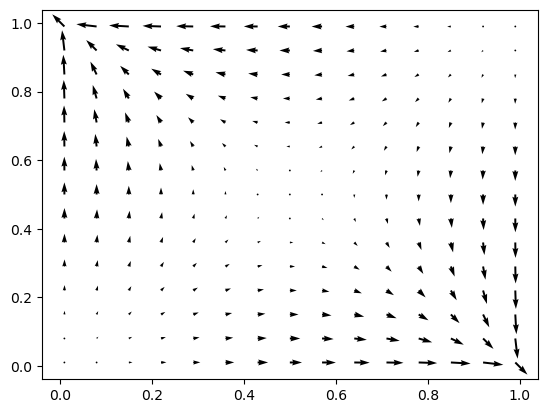

In [127]:
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V, scale=20, )
plt.show()